In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
df_ext = pd.read_csv('../training_data/Lcdm_cube_5sigma_nosig8/_TT.csv.zip', index_col=list(range(14)))
df_ref = pd.read_csv('../training_data/Lcdm_cube_5sigma_nosig8/_TT_ref.csv.zip', index_col=list(range(2)))

In [4]:
data_path = '/work/bk935060/Looti/looti/datahandle/Lcdm_cube_5sigma_500_npca8/TT_pca8.sav' 
intobj_path = '/work/bk935060/Looti/looti/emulators/Lcdm_cube_5sigma_500_npca8/TT_pca8.sav' 

n_train = 500
n_test = 100
num_parameter = 6
npca = 8

In [5]:
emulation_data = pickle.load(open(data_path, 'rb'))
intobj = pickle.load(open(intobj_path, 'rb'))

/home/bk935060/miniconda3/envs/looti/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/bk935060/miniconda3/envs/looti/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
colors = plt.cm.coolwarm(np.linspace(0, 1, n_train +2))
colors_pca = plt.cm.coolwarm(np.linspace(0, 1, npca))

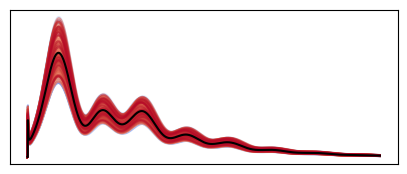

In [7]:
# plt.figure(figsize=(8, 6))
plt.figure(figsize=(5, 2))
spectra = df_ext.loc['TT'].values
fid_spec = df_ref.loc['TT'].values[0]
grid = np.linspace(1, 2511, 2511)
l_factor = grid * (grid+1) / (2*np.pi)
for spec, color in zip(spectra*l_factor, colors):
    plt.plot(grid, spec, c=color, alpha=0.5)
plt.plot(grid, fid_spec*l_factor, c='black', label='Fiducial $D_{\mathrm{\ell, fid}}^{TT}$')
# plt.title('Raw Temperature Spectra (500 samples)', fontsize=16)
# plt.xlabel(r'$\ell$', fontsize=14)
# plt.tick_params(axis='both', labelsize=12)
# plt.ylabel(r'$D_{\mathrm{\ell}}^{TT}$', fontsize=14) #\ell(\ell+1)/2\pi
# plt.grid()
# plt.legend(fontsize=14)
plt.xticks([])
plt.yticks([])
plt.savefig('../plots/final_plots/thumbnail_data_spectra_raw_black.pdf', bbox_inches='tight')

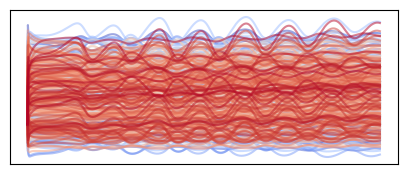

In [8]:
trainspace_matrix = intobj.trainspace_mat
plt.figure(figsize=(5, 2))
for spec, color in zip(trainspace_matrix, colors):
    plt.plot(grid, spec, c=color, alpha=0.5)
# plt.title('Scaled Temperature Spectra (500 samples)', fontsize=16)
# plt.xlabel(r'$\ell$', fontsize=14)
# plt.tick_params(axis='both', labelsize=12)
# plt.ylabel(r'$D_{\mathrm{\ell}}^{TT}\ / \ D_{\mathrm{\ell}, fid}^{TT} $', fontsize=14) #\ell(\ell+1)/2\pi
# plt.grid()
plt.xticks([])
plt.yticks([])
plt.savefig('../plots/final_plots/thumbnail_data_spectra_normed.pdf', bbox_inches='tight')


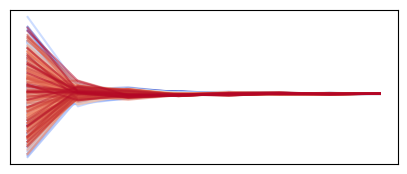

In [9]:
pca_raw = intobj.pca.fit(trainspace_matrix).transform(trainspace_matrix)
grid_pca = np.linspace(1, npca, npca)
plt.figure(figsize=(5, 2))
for pcar, color in zip(pca_raw, colors):
    plt.plot(grid_pca, pcar, c=color, alpha=0.5)

# plt.title('Raw PCA Transformed Data', fontsize=16)
# plt.xlabel(r'Principal Component', fontsize=14)
# plt.tick_params(axis='both', labelsize=12)
# plt.ylabel(r'Raw Values', fontsize=14) #\ell(\ell+1)/2\pi
# plt.grid()
plt.xticks([])
plt.yticks([])
plt.savefig('../plots/final_plots/thumbnail_data_pca_raw.pdf', bbox_inches='tight')


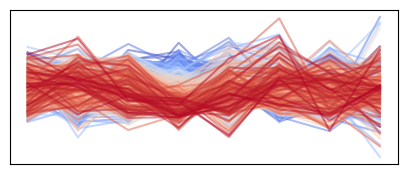

In [10]:
pca_test = intobj.representation
plt.figure(figsize=(5, 2))
for pca, color in zip(pca_test, colors):
    plt.plot(np.linspace(1, npca, npca), pca, c=color, alpha=0.5)

# plt.title('Standardized PCA Transformed Data', fontsize=16)
# plt.xlabel(r'Principal Component', fontsize=14)
# plt.tick_params(axis='both', labelsize=12)
# plt.ylabel(r'Standardized Value', fontsize=14) #\ell(\ell+1)/2\pi
# plt.grid()
plt.xticks([])
plt.yticks([])
plt.savefig('../plots/final_plots/thumbnail_data_pca_normed.pdf', bbox_inches='tight')


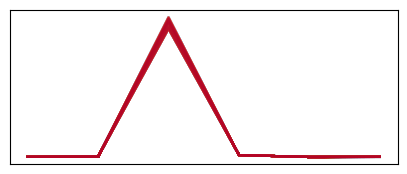

In [11]:
trainspace_raw = intobj.trainspace
params = ['$\omega_b$', '$\omega_cdm$', '$H_{0}$', '$n_s$', '$A_s$', '$\\tau_\mathrm{reio}$']
grid_input = np.linspace(1, num_parameter, num_parameter)

plt.figure(figsize=(5, 2))
for tsr, color in zip(trainspace_raw, colors):
    plt.plot(grid_input, tsr, c=color, alpha=0.5)

# plt.title('Raw Input', fontsize=16)
# plt.xlabel(r'Cosmological Parameters', fontsize=14)
# plt.tick_params(axis='both', labelsize=12)
# plt.ylabel(r'Raw Values', fontsize=14) #\ell(\ell+1)/2\pi
# plt.xticks(list(range(1, 7)), labels=params)
# plt.tick_params(axis='both', labelsize=12)
# plt.grid()
plt.xticks([])
plt.yticks([])
plt.savefig('../plots/final_plots/thumbnail_data_input_raw.pdf', bbox_inches='tight')


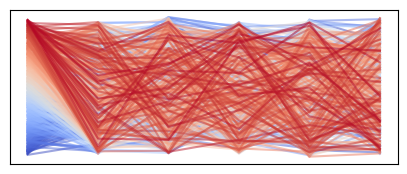

In [12]:
trainspace_normed = (trainspace_raw - trainspace_raw.mean(axis=0)) / trainspace_raw.std(axis=0)
params = ['$\omega_b$', '$\omega_cdm$', '$H_{0}$', '$n_s$', '$A_s$', '$\\tau_\mathrm{reio}$']
grid_input = np.linspace(1, num_parameter, num_parameter)
plt.figure(figsize=(5, 2))
for tsr, color in zip(trainspace_normed, colors):
    plt.plot(grid_input, tsr, c=color, alpha=0.5)

# plt.title('Standardized Input', fontsize=16)
# plt.xlabel(r'Cosmological Parameters', fontsize=14)
# plt.tick_params(axis='both', labelsize=12)
# plt.ylabel(r'Standardized Values', fontsize=14) #\ell(\ell+1)/2\pi
# plt.xticks(list(range(1, 7)), labels=params)
# plt.tick_params(axis='both', labelsize=12)
# plt.grid()
plt.xticks([])
plt.yticks([])
plt.savefig('../plots/final_plots/thumbnail_data_input_norm.pdf', bbox_inches='tight')

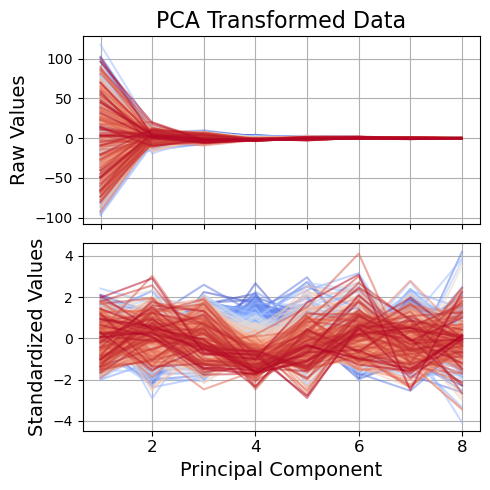

In [13]:
fig, ax =plt.subplots(2, figsize=(5, 5))
fig.set_tight_layout(tight=True)

for pca, color in zip(pca_raw, colors):
    ax[0].plot(np.linspace(1, npca, npca), pca, c=color, alpha=0.5)
ax[0].set_xticklabels([])
ax[0].set_ylabel(r'Raw Values', fontsize=14) #\ell(\ell+1)/2\pi
ax[0].grid()
ax[0].set_title('PCA Transformed Data', fontsize=16)

for pca, color in zip(pca_test, colors):
    ax[1].plot(np.linspace(1, npca, npca), pca, c=color, alpha=0.5)
ax[1].set_xlabel(r'Principal Component', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_ylabel(r'Standardized Values', fontsize=14) #\ell(\ell+1)/2\pi
ax[1].grid()
plt.savefig('../plots/final_plots/data_pca.pdf', bbox_inches='tight')

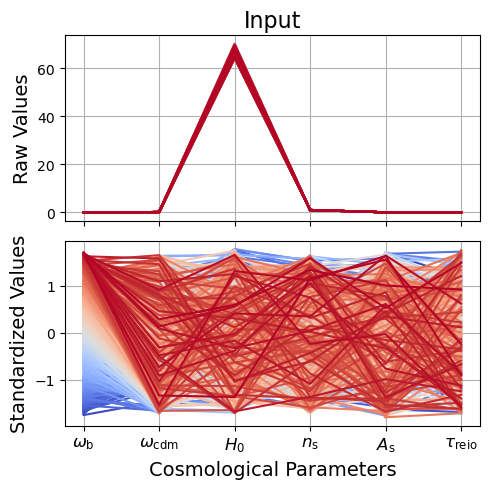

In [14]:
trainspace_raw = intobj.trainspace
trainspace_normed = (trainspace_raw - trainspace_raw.mean(axis=0)) / trainspace_raw.std(axis=0)
params = ['$\omega_\mathrm{b}$', '$\omega_\mathrm{cdm}$', '$H_{0}$', '$n_\mathrm{s}$', '$A_\mathrm{s}$', '$\\tau_\mathrm{reio}$']

fig, ax =plt.subplots(2, figsize=(5, 5))
fig.set_tight_layout(tight=True)

for tsr, color in zip(trainspace_raw, colors):
    ax[0].plot(np.linspace(1, 6, 6), tsr, c=color)
ax[0].set_ylabel('Raw Values', fontsize=14)
ax[0].set_xticklabels([])
ax[0].set_title('Input', fontsize=16)
ax[0].grid()


for tsr, color in zip(trainspace_normed, colors):
    ax[1].plot(np.linspace(1, 6, 6), tsr, c=color)
ax[1].set_xticks(list(range(1, 7)))
ax[1].set_xticklabels(params, fontsize=12)
ax[1].set_xlabel('Cosmological Parameters', fontsize=14)
ax[1].set_ylabel('Standardized Values', fontsize=14)
ax[1].grid()
plt.savefig('../plots/final_plots/data_input.pdf', bbox_inches='tight')

In [15]:
gp_dict = intobj.gp_dict
gp = gp_dict['gp_0']
gp

GaussianProcessRegressor(kernel=RBF(length_scale=[1, 1, 1, 1, 1, 1]),
                         n_restarts_optimizer=40)

In [16]:
plot_index = 5

In [17]:
indexvalues = emulation_data.test_samples[plot_index]
truth_spectrum = emulation_data.df_ext.loc['TT', 0.0, 'omega_b', indexvalues[0], 'omega_cdm', indexvalues[1], 'H0', indexvalues[2], 'n_s', indexvalues[3], 'A_s', indexvalues[4], 'tau_reio', indexvalues[5]].values.flatten()

ref_spectrum = emulation_data.df_ref.loc['TT'].values.flatten()
truth_spectrum_normed = (truth_spectrum/ref_spectrum - emulation_data.binwise_mean) / emulation_data.binwise_std
prediction_spectrum_normed = intobj.predict(emulation_data.test_samples)[tuple(indexvalues)]

In [18]:
a = np.empty((3))
b = np.array([4, 5, 6])
c = np.vstack((a, b))
c

array([[1., 0., 1.],
       [4., 5., 6.]])

In [19]:
indexvalues = emulation_data.test_samples[plot_index]
ref_spectrum = emulation_data.df_ref.loc['TT'].values.flatten()
truth_spectrum_test = emulation_data.df_ext.loc['TT', 0.0, 
                                                'omega_b', indexvalues[0], 
                                                'omega_cdm', indexvalues[1], 
                                                'H0', indexvalues[2], 
                                                'n_s', indexvalues[3], 
                                                'A_s', indexvalues[4], 
                                                'tau_reio', indexvalues[5]].values.flatten()

truth_spectrum_normed_test = ((truth_spectrum_test/ref_spectrum) - emulation_data.binwise_mean) / emulation_data.binwise_std

truth_pca_test1 = intobj.pca.transform([truth_spectrum_normed_test]).flatten()
truth_pca_test = (truth_pca_test1 - intobj.matPCA_mean) / intobj.matPCA_std
xtest = (emulation_data.test_samples - intobj.trainspace_mean) / intobj.trainspace_std
pred_list = []
std_list = []
for gp_regressor in list(intobj.gp_dict.values()):
    pred_temp, std_temp = gp_regressor.predict(xtest, return_std=True)
    pred_list.append(list(pred_temp))
    std_list.append(list(std_temp))
prediction_pca_test = np.array(pred_list).T
std_pca_test = np.array(std_list).T

In [20]:
truth_normed_pcas_list = []

for ii in range(20):
    indexvalues = emulation_data.test_samples[ii]
    ref_spectrum = emulation_data.df_ref.loc['TT'].values.flatten()
    truth_spectrum_test = emulation_data.df_ext.loc['TT', 0.0, 
                                                    'omega_b', indexvalues[0], 
                                                    'omega_cdm', indexvalues[1], 
                                                    'H0', indexvalues[2], 
                                                    'n_s', indexvalues[3], 
                                                    'A_s', indexvalues[4], 
                                                    'tau_reio', indexvalues[5]].values.flatten()

    truth_spectrum_normed_test = ((truth_spectrum_test/ref_spectrum) - emulation_data.binwise_mean) / emulation_data.binwise_std
    truth_pca_test_raw = intobj.pca.transform([truth_spectrum_normed_test]).flatten()
    truth_pca_test = (truth_pca_test_raw - intobj.matPCA_mean) / intobj.matPCA_std
    truth_normed_pcas_list.append(truth_pca_test)

truth_normed_pcas = np.array(truth_normed_pcas_list)

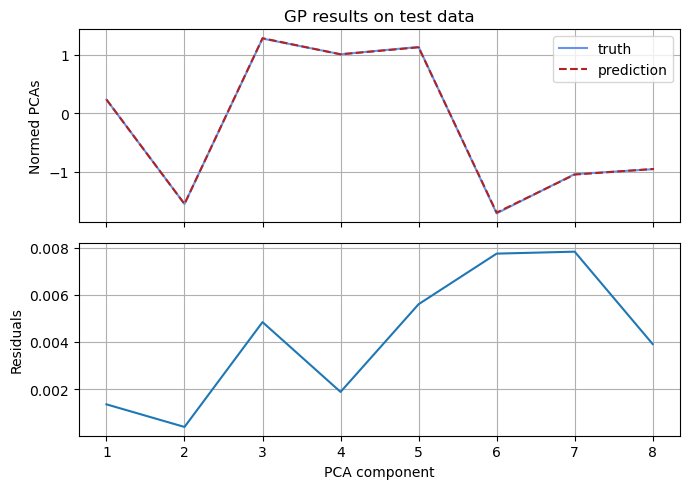

In [21]:
indexvalues = emulation_data.test_samples[plot_index]
ref_spectrum = emulation_data.df_ref.loc['TT'].values.flatten()
truth_spectrum_test = emulation_data.df_ext.loc['TT', 0.0, 
                                                'omega_b', indexvalues[0], 
                                                'omega_cdm', indexvalues[1], 
                                                'H0', indexvalues[2], 
                                                'n_s', indexvalues[3], 
                                                'A_s', indexvalues[4], 
                                                'tau_reio', indexvalues[5]].values.flatten()

truth_spectrum_normed_test = ((truth_spectrum_test/ref_spectrum) - emulation_data.binwise_mean) / emulation_data.binwise_std

truth_pca_test1 = intobj.pca.transform([truth_spectrum_normed_test]).flatten()
truth_pca_test = (truth_pca_test1 - intobj.matPCA_mean) / intobj.matPCA_std
xtest = (emulation_data.test_samples - intobj.trainspace_mean) / intobj.trainspace_std
pred_list = []
std_list = []
for gp_regressor in list(intobj.gp_dict.values()):
    pred_temp, std_temp = gp_regressor.predict(xtest, return_std=True)
    pred_list.append(list(pred_temp))
    std_list.append(list(std_temp))
prediction_pca_test = np.array(pred_list).T
std_pca_test = np.array(std_list).T
# prediction_pca_test = intobj.interpolated_atoms(xtest)[plot_index]

fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(np.linspace(1, npca, npca), truth_pca_test, c='cornflowerblue', label='truth')
ax[0].plot(np.linspace(1, npca, npca), prediction_pca_test[plot_index], c='firebrick', linestyle='--', label='prediction')
ax[0].errorbar(np.linspace(1, npca, npca), prediction_pca_test[plot_index], yerr=std_pca_test[plot_index], linestyle='', color='firebrick')
# ax[0].fill_between(np.linspace(1, npca, npca), prediction_pca_test[plot_index]-std_pca_test[plot_index], prediction_pca_test[plot_index]+std_pca_test[plot_index])
ax[0].legend()
ax[0].set_ylabel('Normed PCAs')
ax[0].set_xticks(np.arange(1, npca+1))
ax[0].set_xticklabels([])
ax[0].set_title('GP results on test data')
ax[0].grid()

residuals = np.abs(1- (prediction_pca_test[plot_index]/truth_pca_test))
ax[1].plot(np.linspace(1, npca, npca), residuals)
ax[1].set_xticks(np.arange(1, npca+1))
ax[1].set_xlabel('PCA component')
ax[1].set_ylabel('Residuals')
ax[1].grid()

In [22]:
print('PCA:', prediction_pca_test.max())
print('STD:', std_pca_test.max())
print('RATIO:', std_pca_test.max()/prediction_pca_test.max())

PCA: 2.706483624788234
STD: 0.04670792221654141
RATIO: 0.017257788589131413


In [23]:
from looti import dictlearn as dcl

In [ ]:
prediction_spectrum_normed_test = intobj.predict(emulation_data.test_samples)[tuple(indexvalues)]
prediction_spectrum_normed_test = dcl.predict(emulation_data.test_samples)[tuple(indexvalues)]
# prediction_spectrum_normed = ratios_predicted[tuple(emulation_data.test_samples[plot_index])]

fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(np.linspace(1, 2511, 2511), truth_spectrum_normed_test, c='cornflowerblue', label='truth')
ax[0].plot(np.linspace(1, 2511, 2511), prediction_spectrum_normed_test, c='firebrick', linestyle='--', label='prediction')
ax[0].fill_between()
ax[0].legend()
ax[0].set_ylabel('Normed Spectra')
ax[0].set_xticklabels([])
ax[0].set_title('GP results on test data')
# ax[0].hlines(0, 1, 2499, color='black', alpha=0.3)

residuals = np.abs(1 - prediction_spectrum_normed_test / truth_spectrum_normed_test)
ax[1].plot(np.linspace(1, 2511, 2511), residuals)
ax[1].set_xlabel('PCA component')
ax[1].set_ylabel('Residuals')
plt.show()

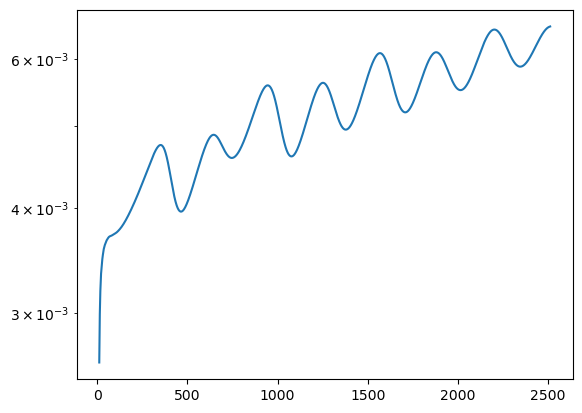

In [60]:
plt.semilogy(grid[10:], std_test[10:])

/tmp/bk935060/login18-1_17369/ipykernel_167741/4014128709.py:35: RuntimeWarning: divide by zero encountered in divide
  ax[2].fill_between(grid[2:], ((residuals-std_test)/cv)[2:], ((residuals+std_test)/cv)[2:], color='cornflowerblue')
/tmp/bk935060/login18-1_17369/ipykernel_167741/4014128709.py:36: RuntimeWarning: divide by zero encountered in divide
  ax[2].plot(grid[2:], (residuals / cv)[2:], color='firebrick')


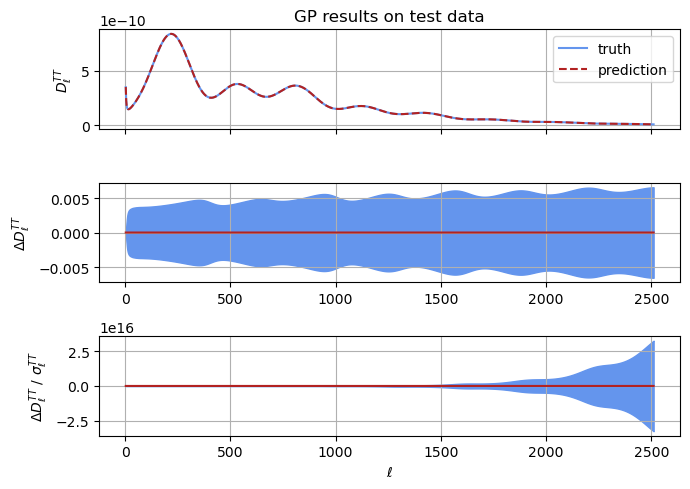

In [65]:
# CL PREDICTION:
prediction_spectrum_normed_test = intobj.predict(emulation_data.test_samples)
prediction_spectrum_test = intobj.reconstruct_spectra(ratios_predicted=prediction_spectrum_normed_test)[tuple(indexvalues)]

# STD:
interp_atoms = std_pca_test * intobj.matPCA_std + intobj.matPCA_mean
predict_mat = np.dot(interp_atoms, intobj.dictionary) + intobj.pca_mean
predict_mat_dict = intobj.matrixdata_to_dict(predict_mat, intobj.predict_space)
std_spectrum_test = intobj.reconstruct_spectra(ratios_predicted=predict_mat_dict)[tuple(indexvalues)]
std_test = ((np.dot((std_pca_test * intobj.matPCA_std), intobj.dictionary)+intobj.pca_mean) * intobj.binwise_std)[plot_index]

# FIGURE:
fig, ax =plt.subplots(3, figsize=(7, 5))
fig.set_tight_layout(tight=True)

# SPECTRA PLOT
ax[0].plot(grid[2:], (truth_spectrum_test*l_factor)[2:], c='cornflowerblue', label='truth')
ax[0].plot(grid[2:], (prediction_spectrum_test*l_factor)[2:], c='firebrick', linestyle='--', label='prediction')
ax[0].fill_between(grid[2:], ((prediction_spectrum_test)*l_factor)[2:], ((prediction_spectrum_test)*l_factor)[2:])
ax[0].legend()
ax[0].set_ylabel(r'$D_\mathrm{\ell}^{TT}$')
ax[0].set_xticklabels([])
ax[0].set_title('GP results on test data')
ax[0].grid()

# RESIDUAL PLOT:
residuals = (prediction_spectrum_test - truth_spectrum_test)
# residuals = np.abs(1 - prediction_spectrum_test / truth_spectrum_test)
ax[1].fill_between(grid[2:], (residuals-std_test)[2:], (residuals+std_test)[2:], color='cornflowerblue')
ax[1].plot(grid[2:], (residuals * l_factor)[2:], color='firebrick')
ax[1].set_ylabel(r'$\Delta D_\mathrm{\ell}^{TT}$')
ax[1].grid()

cv = np.abs(truth_spectrum_test) / np.sqrt(grid + 0.5)
ax[2].fill_between(grid[2:], ((residuals-std_test)/cv)[2:], ((residuals+std_test)/cv)[2:], color='cornflowerblue')
ax[2].plot(grid[2:], (residuals / cv)[2:], color='firebrick')
ax[2].set_ylabel(r'$\Delta D_\mathrm{\ell}^{TT} \ / \ \sigma_\mathrm{\ell}^{TT}$')
ax[2].set_xlabel('$\\ell$')
ax[2].grid()

In [ ]:
plot_index = 0
xtrain = (emulation_data.train_samples - emulation_data.train_samples.mean(axis=0)) / emulation_data.train_samples.std(axis=0)
prediction_pca_normed = intobj.gp_regressor.predict(xtrain)
truth_pca_normed = intobj.representation
fig, ax =plt.subplots(2, figsize=(7, 5))
fig.set_tight_layout(tight=True)
ax[0].plot(np.linspace(1, npca, npca), truth_pca_normed[plot_index], c='cornflowerblue', label='truth')
ax[0].plot(np.linspace(1, npca, npca), prediction_pca_normed[plot_index], c='firebrick', linestyle='--', label='prediction')
ax[0].legend()
ax[0].set_ylabel('Normed PCAs')
ax[0].set_xticks(np.arange(1, npca+1))
ax[0].set_xticklabels([])
ax[0].set_title('GP results on training data')

residuals = np.abs(1- (prediction_pca_normed/truth_pca_normed))
ax[1].plot(np.linspace(1, npca, npca), residuals[plot_index])
ax[1].set_xticks(np.arange(1, npca+1))
ax[1].set_xlabel('PCA component')
ax[1].set_ylabel('Residuals')

In [16]:
# import numpy as np

# from matplotlib import pyplot as plt

# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
#                                               ExpSineSquared, DotProduct,
#                                               ConstantKernel)

# kernel = RBF(length_scale=[1, 1, 1, 1, 1, 1])

# # Specify Gaussian Process
# gp = GaussianProcessRegressor(kernel=kernel)

# # Plot prior
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# X_ = emulation_data.trainspace
# y_mean, y_std = gp.predict(X_, return_std=True)
# plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
# plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
#                     alpha=0.2, color='k')
# y_samples = gp.sample_y(X_[:, np.newaxis], 10)
# plt.plot(X_, y_samples, lw=1)
# plt.xlim(0, 5)
# plt.ylim(-3, 3)
# plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

# # Generate data and fit GP
# rng = np.random.RandomState(4)
# X = rng.uniform(0, 5, 10)[:, np.newaxis]
# y = np.sin((X[:, 0] - 2.5) ** 2)
# gp.fit(X, y)

# # Plot posterior
# plt.subplot(2, 1, 2)
# X_ = np.linspace(0, 5, 100)
# y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
# plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
# plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
#                     alpha=0.2, color='k')

# y_samples = gp.sample_y(X_[:, np.newaxis], 10)
# plt.plot(X_, y_samples, lw=1)
# plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
# plt.xlim(0, 5)
# plt.ylim(-3, 3)
# plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
#             % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
#             fontsize=12)
# plt.tight_layout()

# plt.show()